## Question 1: Common PyTorch Operations
You have used PyTorch in your last assignment. In this question, let's get to know PyTorch better by performing some common operations. In practice, you will be using these operations frequently.

For now, import PyTorch first. If you don't have it installed, you can install it by running `!pip install torch` in a code cell.

In addition, you may find their documentation to learn more: https://pytorch.org/docs/stable/index.html

In [ ]:
import torch
import numpy as np

### Question 1.1: Tensor Operations (5 points)
In this question, we will look at some common code snippets you will encounter when working with PyTorch tensors.

In [ ]:
# Create a 2D tensor
A = torch.tensor([[1, 2], [3, 4]])
# Create an all-ones tensor with the same shape as A
B = torch.ones_like(A)
# Create an all-zeros tensor with the same shape as A
C = torch.zeros_like(A)

##### Your code starts here #####

# Print out the shape of tensor A
print("Shape of Tensor A: ", A.shape)
# Print out the result of multiplying tensor A with tensor B
print("Matrix Multiplication of Tensor A x Tensor B: ", torch.matmul(A, B)) #Matrix Multiplication
print("Element-wise Multiplication of Tensor A x Tensor B: ", torch.mul(A, B)) #Element-wise Multiplication
# Concatenate B and C along dimension 0 and print out the shape of the result
D = torch.cat((B,C), dim=0)
print("Resulting Matrix Shape: ", D.shape)
# Reshape A into a 1D tensor and print out A
print("Reshaped Tensor A: ", torch.reshape(A, (-1,)))
# Create a random tensor of shape (3, 3) with values from 0 to 1 and print out the tensor
print("Resulting Tensor: ", torch.rand([3,3]))

Shape of Tensor A:  torch.Size([2, 2])
Matrix Multiplication of Tensor A x Tensor B:  tensor([[3, 3],
        [7, 7]])
Element-wise Multiplication of Tensor A x Tensor B:  tensor([[1, 2],
        [3, 4]])
Resulting Matrix Shape:  torch.Size([4, 2])
Reshaped Tensor A:  tensor([1, 2, 3, 4])
Resulting Tensor:  tensor([[0.8664, 0.6133, 0.2550],
        [0.4765, 0.6155, 0.2107],
        [0.8812, 0.5791, 0.1390]])


### Question 1.2: Autograd (5 points)
Autograd is a feature offered by PyTorch that automatically computes gradients for tensors, this facilitates the updating of model parameters during training. In this question, you will work with autograd to compute gradients for a tensor.

In [ ]:
# Define a simple function
def f(x):
    return x[0] + x[1] * x[1]


##### Your code starts here #####

# Create a 2-element 1D tensor `param` with automatic differentiation enabled
# hint: use argument `requires_grad`
param = torch.rand(2, requires_grad=True)

# Calculate the gradient of f with respect to `param`
# hint: use `torch.autograd.grad` function
gradient = torch.autograd.grad(f(param), param)
# Print out the gradient
print("Gradient: ", gradient)

Gradient:  (tensor([1.0000, 1.0818]),)


### Question 1.3: The Neural Network Module (5 points)
`torch.nn` provides a simple way to define neural network architectures. In this question, you will use `torch.nn` to define a simple linear model.

In [ ]:
##### Your code starts here #####

# Create a Linear model using torch.nn.Linear, with input size 4 and output size 1
linearModel = torch.nn.Linear(4, 1)
# Create 1D input tensor of size 4
input = torch.rand(1, 4) #adding batch size as 1 because torch.nn.Linear is modelled to work with multiple inputs.
# Print out the output of the model given the input tensor
output = linearModel(input)
print("Output: ", output, "Output Size: ", output.size())

Output:  tensor([[-0.2866]], grad_fn=<AddmmBackward0>) Output Size:  torch.Size([1, 1])


### Question 1.4: Computing Devices (5 points)
PyTorch allows you to run your code on different devices, such as CPUs and GPUs. In this question, we will be checking for a CUDA device (NVIDIA GPU) and move data to and from it if available (don't worry if you don't have a CUDA-compatible GPU).

In [ ]:
cuda_available = torch.cuda.is_available()  # Check if a CUDA GPU is available

##### Your code starts here #####
cuda_available
# Define the device to be used
device = torch.device('cpu') #CPU chosen since cuda wasn't available as printed above
# Create a 4x4 tensor and move it to the device
input = torch.rand(4, 4)
input.to(device)
# Print out the tensor's device
print("Device: ", input.device)
# Move it back to the CPU device
input.to('cpu')

Device:  cpu


tensor([[0.9765, 0.6969, 0.4777, 0.5926],
        [0.3649, 0.8785, 0.5311, 0.7301],
        [0.8698, 0.2124, 0.9043, 0.1255],
        [0.5234, 0.9927, 0.5572, 0.7015]])

## Question 2: Linear Modeling on Titanic Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this question, we ask you to build a linear model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

![titanic.png](attachment:titanic.png)

Why did Rose survive and Jack didn't? Let's find out!

![titanic-meme.png](attachment:titanic-meme.png)

### Question 2.1: Data Preprocessing (25 points)
Real world data is often messy and requires preprocessing before it can be used for modeling. This procedure is ubiquitous in real-world applications and is often referred to as "data cleaning" and "feature engineering". In this question, you will preprocess the Titanic dataset. The dataset can be found in the data folder.

In this question, we will be using Pandas, a powerful tool for tabular data manipulation. If you don't have it installed, you can install it by running `!pip install pandas` in a code cell.

Before we start, let's load the dataset and take a look at the first few rows.


In [ ]:
import pandas as pd

# Load the titanic dataset
path = "train.csv"
data = pd.read_csv(path)

# Print out the column names
print(data.columns)

# Print out the shape of the dataset
print(data.shape)

# Print out the first 5 rows of the dataset
print(data.head(5))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C 

Here's some information about the columns in the dataset:
* PassengerId: Unique identifier for each passenger (index, not predictive).
* Survived: Target variable (0 = did not survive, 1 = survived).
* Pclass: Travel class (1 = upper, 2 = middle, 3 = lower).
* Name: Full name, may contain titles indicating social status.
* Sex: Gender of the passenger (male/female).
* Age: Passenger's age in years (missing values exist).
* SibSp: Number of siblings/spouses aboard.
* Parch: Number of parents/children aboard.
* Ticket: Ticket number (possible grouping or class info).
* Fare: Ticket fare paid (proxy for socio-economic status).
* Cabin: Cabin number (location on ship, many missing values).
* Embarked: Port of boarding (C = Cherbourg, Q = Queenstown, S = Southampton).

Based on your intuition, do you think all of the columns are useful for predicting survival? If not, which columns can be dropped? (Answer in the markdown cell below)


The following columns are insignificant in the prediction of passenger survival and can be dropped:

- Ticket - Grouping makes the data noisy and therefore, it is not likely ot be helpful.
- Cabin - Data can be sparse because of the missing values.
- PassengerId - Since it is just an index.
- Name - The titles in name can be useful however, eventually in the code, we are not doing any feature engineering and just the names without titles would be useless. In that case, we also drop the Name column.

Building on your previous answer, drop the columns that you think are not useful for predicting survival.

In [ ]:
##### Your code starts here #####

# Drop unnecessary columns
data = data.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis=1)

Some of the columns in the dataset seems to have missing values, why and how would you handle missing values in the dataset? Try to propose other ways compared to the method below. (Answer in the markdown cell below)

Missing values need to be handled to ensure consistency in the dataset.

They can introduce noise or bias in the dataset and can evetually lead to inaccurate predictions or loss of information.


Some methods we can use are:
- Replace with 'na' indicating a missing value.
- If it does not lead to sparsity, rows with missing values can be deleted.


For now, we use the median value to fill the missing numerical values, and the most frequent value to fill the missing categorical values.

In [ ]:
# Fill missing values in the "Age" column with the median age
median_age = data['Age'].median()
data['Age'] = data['Age'].fillna(median_age)
print("Missing values in age: ", data['Age'].isnull().sum())
# Fill missing values in the "Embarked" column with the most common port
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(mode_embarked)
print("Missing values in Embarked: ", data['Embarked'].isnull().sum())

Missing values in age:  0
Missing values in Embarked:  0


Lastly, we know that computers can't handle textural data directly, so we need to convert the categorical columns into numerical columns. One common way to do this is by using one-hot encoding. It creates an one-to-one mapping between the categorical values and the numerical values.

In [ ]:
# one-hot encoding on the categorical columns
data = pd.get_dummies(data, columns = ['Embarked', 'Sex'])
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,False,False,True,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,True,False
2,1,3,26.0,0,0,7.9250,False,False,True,True,False
3,1,1,35.0,1,0,53.1000,False,False,True,True,False
4,0,3,35.0,0,0,8.0500,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,False,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True,True,False
888,0,3,28.0,1,2,23.4500,False,False,True,True,False
889,1,1,26.0,0,0,30.0000,True,False,False,False,True


Before we can use this data for training, we should split the data into features and target. In addition, you need to make sure that your dataset has no missing values and all columns are numerical.

In [ ]:
X = data.drop(columns=["Survived"]) # features
y = data["Survived"]                # target

# Check if there are any missing values in the dataset
print(data.isnull().sum().sum())    # this should return 0

# Check if all columns are numeric
print(data.dtypes)                  # all columns should be numeric (or boolean)

0
Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
Sex_female       bool
Sex_male         bool
dtype: object


Now let's do the same for our test dataset.

In [ ]:
path = "test.csv"
test_data = pd.read_csv(path)
target_path = "gender_submission.csv"
target = pd.read_csv(target_path)
# Merge the test data with the target data
test_data = pd.merge(test_data, target, on="PassengerId")

# Same preprocessing steps for the test set
print(test_data.columns)
print(test_data.shape)
print(test_data.head(5))
# Drop unnecessary columns
test_data = test_data.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'])
# Fill missing values
print("Missing Values in data: ", test_data.isnull().sum())
median_testAge = test_data['Age'].median()
test_data['Age']= test_data['Age'].fillna(median_testAge)
print("Missing values in age: ", test_data['Age'].isnull().sum())

median_testFare = test_data['Fare'].median()
test_data['Fare'] = test_data['Fare'].fillna(median_testFare)
print("Missing values in Fare: ", test_data['Fare'].isnull().sum())
# Do one-hot encoding
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])

# Split the test set into features and target
X_test = data.drop(columns=["Survived"]) # features
y_test = data["Survived"]                # target
# Check for missing values
print("Missing values after pre-processing: ", data.isnull().sum().sum())
# Check for non-numeric columns
print(data.dtypes)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')
(418, 12)
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1

Lastly, we convert the data into PyTorch tensors before giving it to our model.

In [ ]:
# Convert the data to PyTorch tensors
X = X.to_numpy(dtype=np.float32)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Convert the test data as well
X_test = X_test.to_numpy(dtype=np.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

### Question 2.2: Building a Linear Model (10 points)
In this question, you will build a linear model using PyTorch to predict the survival of passengers on the Titanic. Note that the input to the model should be the features of the passengers and the output should be the predicted survival status of the passengers.

Take a look at the skeleton code below, you will see that this class inherits from `torch.nn.Module` and has a method called `forward`. You will see this structure in almost all PyTorch model implementations.

In [ ]:
class LinearModel(torch.nn.Module):
    def __init__(self, input_dim):
        """
        Model initialized with the dimension of the input features
        """
        super(LinearModel, self).__init__()
        # Define some basic linear layers
        self.linear = torch.nn.Linear(input_dim, 1)
        self.activation = torch.nn.Sigmoid()

    def forward(self, x):
        """
        The forward pass of the model
        """
        # Implement the forward method
        output = self.linear(x)
        output = self.activation(output)
        return output

### Question 2.3: Training the Model (10 points)
In this question, you will train the model using the training data. Training a model typically involves 4 essential components:

* model
* training data
* loss function: target function for the model to minimize
* optimizer: the algorithm to update the model parameters

This is true for almost all machine learning systems, from simple linear regressors to large language models with billions of parameters. Thus, it is essential for you to understand what each of these components do.

We have defined the model and processed the training data, now let's define a loss function and an optimizer. Since we are essentially performing binary classification, we will use the binary cross-entropy loss function. In addition, we will use the Adam optimizer to update the model parameters.

In [ ]:
# Instantiate the model
model = LinearModel(X_tensor.shape[1])
# Define loss function
criterion = torch.nn.BCELoss()
# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Now let's implement the training loop to start training the model. Why do we need to train the model on the same data for multiple times (epochs)? (Answer in the markdown cell below)

At every epoch, the model calculates the loss function and updates it's parameters accordingly to increase accuracy. Thus, while the first epoch has a more abstract prediction, it gets more precise with every epoch.

In [ ]:
epochs = 100

model.train()   # set the model to training mode

def train(model, criterion, optimizer, X, y, epochs):
    # Finish implementing the training loop
    for epoch in range(epochs):
        # Forward pass
        y_pred = model(X)
        # Compute Loss
        loss = criterion(y_pred, y)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        # Update weights
        optimizer.step()
        # Zero gradients, backward pass, update weights

        # print out the loss every 10 epochs
        if (epoch + 1) % 10 == 0:
          print("Epoch:", epoch + 1, "Loss:", loss.item())

train(model, criterion, optimizer, X_tensor, y_tensor, epochs)

Epoch: 10 Loss: 0.4408489763736725
Epoch: 20 Loss: 0.4408477246761322
Epoch: 30 Loss: 0.4408465325832367
Epoch: 40 Loss: 0.4408453702926636
Epoch: 50 Loss: 0.4408441483974457
Epoch: 60 Loss: 0.44084301590919495
Epoch: 70 Loss: 0.44084200263023376
Epoch: 80 Loss: 0.4408408999443054
Epoch: 90 Loss: 0.44083985686302185
Epoch: 100 Loss: 0.44083887338638306


### Question 2.4: Evaluation and Conclusion (30 points)
Let's start by defining some metrics to evaluate the model. In this question, you will implement accuracy and mean squared error metrics.

In [ ]:
# Implement a function to calculate the accuracy of the model
def accuracy(y_pred, y_true):
  y_pred_class = (y_pred >= 0.5).float()
  correct = (y_pred_class == y_true).sum()
  accuracy = correct / len(y_true)
  return accuracy.item()


# Implement a function to calculate the mean squared error of the model
def mse(y_pred, y_true):
  return torch.mean((y_pred - y_true)**2).item()

Next, let's evaluate the model on the test dataset using the metrics you have implemented. You should get an accuracy above 80%. If not, rerun the training process again until you get an accuracy above 80%. Explain why we get different results each time we train the model. Are there other ways to ensure we get a representative result? (Answer in the markdown cell below)

There are mutliple factors that affect this. One of the main ones is that the weights rae initilially randomised but then once the model starts learning and trained, the error is reduced.

In [ ]:
model.eval()            # set the model to evaluation mode

with torch.no_grad():   # turn off gradients
    # Implement testing and print out the accuracy and mean squared error
    y_pred = model(X_test_tensor)
    print("Accuracy: ", accuracy(y_pred, y_test_tensor))
    print("MSE: ", mse(y_pred, y_test_tensor))

Accuracy:  0.8002244830131531
MSE:  0.1396469622850418


Finally, let's draw some conclusions based on the model you just trained. We will use the weights of the model to directly interpret the importance of each feature in predicting survival. Why is this possible? (Answer in the markdown cell below)

Our model is logistically trained and because of this, the weights of each feature provide an insight that is changed at every iteration due to better fitting of the model.

      Feature  Coefficient
8  Sex_female     2.582775
5  Embarked_C     1.234625
6  Embarked_Q     1.156738
7  Embarked_S     0.825444
4        Fare     0.002230
1         Age    -0.037970
3       Parch    -0.091887
9    Sex_male    -0.135483
2       SibSp    -0.323259
0      Pclass    -1.070219


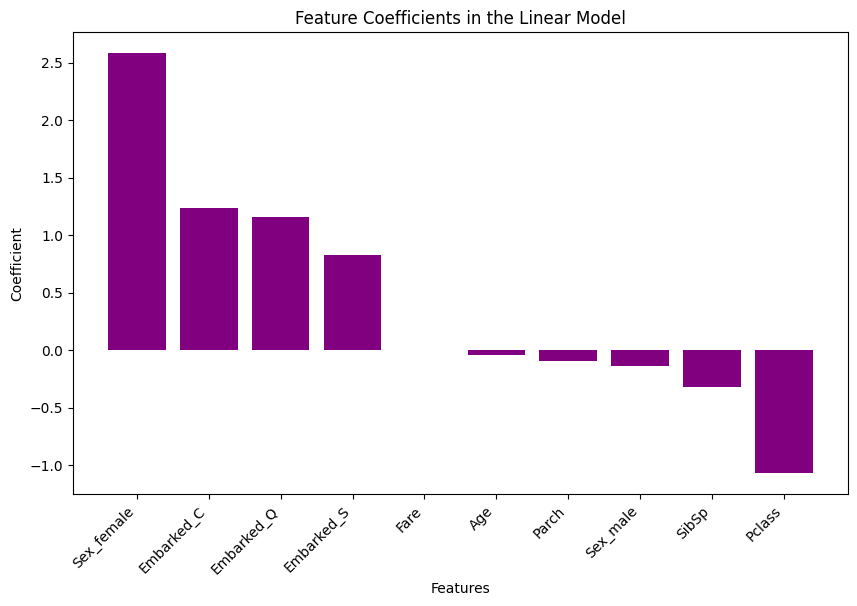

In [ ]:
import matplotlib.pyplot as plt

# Extract coefficients from the model
coefficients = model.linear.weight.detach().numpy().flatten()
X = pd.DataFrame(X, columns=data.columns[1:])
features = X.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)


# Print the coefficients
print(coef_df)

# Plot the coefficients with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(coef_df["Feature"], coef_df["Coefficient"], color='purple')
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Feature Coefficients in the Linear Model")
plt.xticks(rotation=45, ha='right')
plt.show()



Does the result align with your intuition? Why or why not? According to your results, what is the biggest contributing factor of survival? (Answer in the markdown cell below)

The results do align with the intuition. All the factors we thought would affect the model, do affect it to some extent. However, I did think that Age would have had a bigger affect.

The biggest contributor was Sex - Female.

